In [1]:
from statistics import median
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt


[7 2]
[5 4]
[9 6]
[2 3]
[4 7]
[8 1]


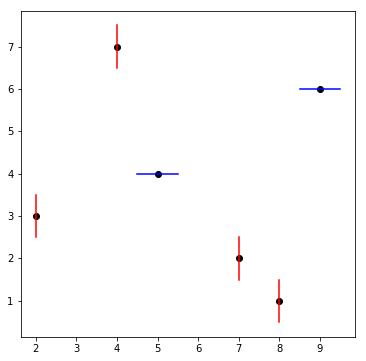

In [5]:
class TreeNode:
    def __init__(self, index=None, left=None, right=None, axis=None):
        self.index = index
        self.axis = axis
        self.left = left
        self.right = right
        return

def build_kdtree_recur(root, data, ndim, ids, depth):
    if len(ids)>0:
        sid = list(np.array(sorted([[i, data[i,depth%ndim]] for i in ids], key = lambda x: x[1]))[:,0])
        mid = len(ids) // 2
        root.index = sid[mid]
        root.axis = depth%ndim
        #print(root.index, root.axis, data[root.index,:])
        if len(ids) > 1:
            root.left = TreeNode()
            build_kdtree_recur(root.left, data, ndim, sid[:mid], depth+1)
        if len(ids) > 2:
            root.right = TreeNode()
            build_kdtree_recur(root.right, data, ndim, sid[mid+1:], depth+1)
        
    return

def plot_kdtree(data, root):
    mins = np.min(data, axis=0)
    maxs = np.max(data, axis=0)
    
    cstr = ['r', 'b']
    plt.figure(1, figsize=(6,6))
    q = [root]
    dx = 0.5
    while q:
        x = q.pop(0)
        print(data[x.index])
        plt.plot(data[x.index, 0], data[x.index, 1], 'ko')    
        if x.axis==0:
            plt.plot([data[x.index, 0]]*2, [data[x.index, 1]-dx, data[x.index, 1]+dx], cstr[x.axis]+'-')
        if x.axis==1:
            plt.plot([data[x.index, 0]-dx, data[x.index, 0]+dx], [data[x.index, 1]]*2, cstr[x.axis]+'-')
        
        if x.left is not None: q.append(x.left)
        if x.right is not None: q.append(x.right)
    return
        
def build_kdtree(data):
    nsample = len(data)
    ndim = len(data[0])
    
    root = TreeNode()
    build_kdtree_recur(root, data, ndim, list(range(nsample)), 0)    
    plot_kdtree(data, root)
    ids = list(range(nsample))

    return


data = np.array([(2,3), (5,4), (9,6), (4,7), (8,1), (7,2)])
build_kdtree(data)
